# Visualization of the Snappy Compression results
The data belongs to the `Go` implementation using purelly Ethereum CL `signed_blocks`


In [9]:
# Import the dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

RESULTS_FOLDER = './../results'
print(RESULTS_FOLDER)

# Read all the available csv files in the given folder
def read_files_with(folder: str, filter: str = ""):
    fs = []
    for dir, _, files in os.walk(folder):
        for file in files:
            if filter in file:
                fs.append(dir+"/"+file)
            else:
                continue
    print(f"found {len(fs)} with {filter} files in {folder}")
    return fs


./../results


In [15]:

files = read_files_with(RESULTS_FOLDER)
dataframes = []
for file in files:
    df = pd.read_csv(file)
    dataframes.append(df)

dfs = pd.concat(dataframes)
dfs = dfs.groupby(['folder','file']).mean().reset_index()
dfs = dfs.drop(columns=["Unnamed: 0", "Unnamed: 0.1"])
dfs.to_csv(RESULTS_FOLDER+'/block_snappy_compression_summary.csv')
display(dfs)


found 198 with  files in ./../results


,folder,file,raw-size,compress-size,encoding-time,decoding-time,compress-ratio,compress-speed
0,json_blocks,block_5913131.json,2713711.0,1618663.0,2867078.2,1322331.5,1.676514,0.953612
1,json_blocks,block_5913132.json,2606359.0,1216511.0,3987640.7,1616925.9,2.142487,0.663915
2,json_blocks,block_5913133.json,2868886.0,1479089.0,4426392.8,1819745.1,1.939630,0.664344
3,json_blocks,block_5918962.json,2413628.0,1097135.0,4034265.8,1623119.5,2.199937,0.601884
4,json_blocks,block_5928007.json,3075768.0,1585516.0,5394898.8,1934330.7,1.939916,0.593172
...,...,...,...,...,...,...,...,...
193,ssz_blocks,block_6510200.ssz,886615.0,846989.0,360137.5,260002.7,1.046785,2.812108
194,ssz_blocks,block_6510204.ssz,973023.0,934415.0,235190.7,125644.0,1.041318,5.156219
195,ssz_blocks,block_6515009.ssz,1113818.0,553483.0,1478722.1,692007.8,2.012380,0.758827
196,ssz_blocks,block_6522215.ssz,993137.0,506216.0,1287427.1,623499.5,1.961884,0.785314


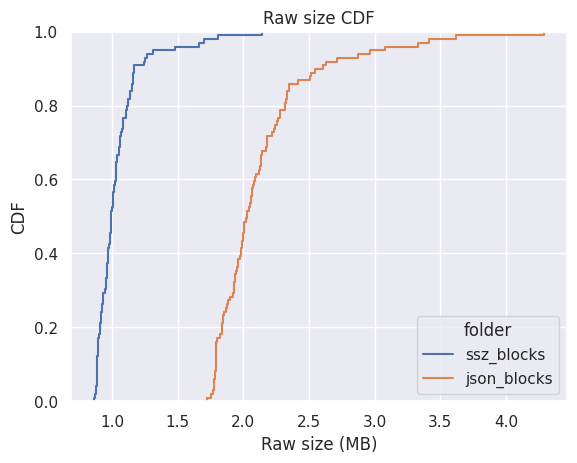

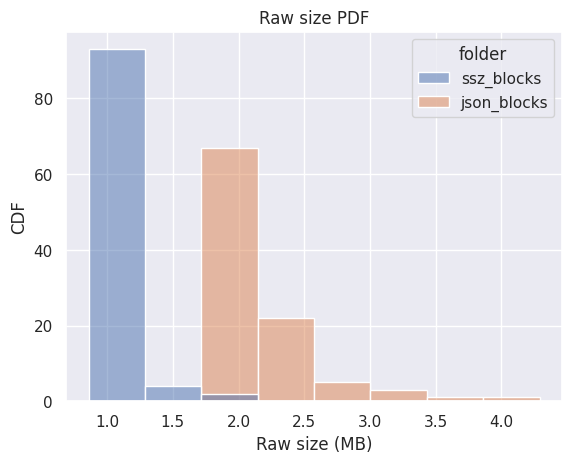

In [11]:
# Raw Size
dfs = dfs.sort_values('raw-size')
dfs['raw_size_mb'] = dfs['raw-size'] / 1000_000 # MB
sns.set()
g = sns.ecdfplot(data=dfs, x='raw_size_mb', hue='folder')
g.set(title="Raw size CDF", xlabel="Raw size (MB)", ylabel="CDF")
plt.savefig(RESULTS_FOLDER+'/plots/raw_size_cdf.png')
plt.show()

sns.set()
g = sns.histplot(data=dfs, x='raw_size_mb', bins=8, hue='folder')
g.set(title="Raw size PDF", xlabel="Raw size (MB)", ylabel="CDF")
plt.savefig(RESULTS_FOLDER+'/plots/raw_size_pdf.png')
plt.show()

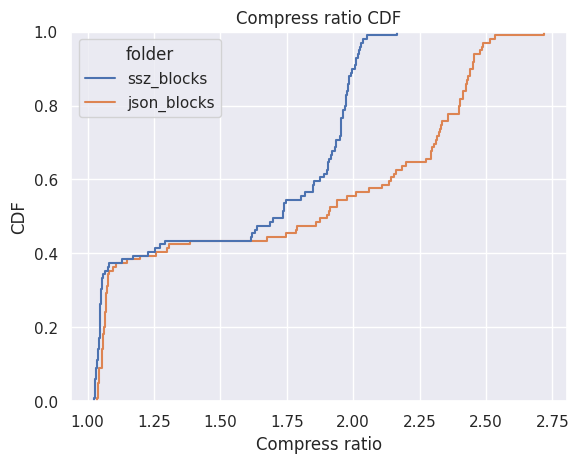

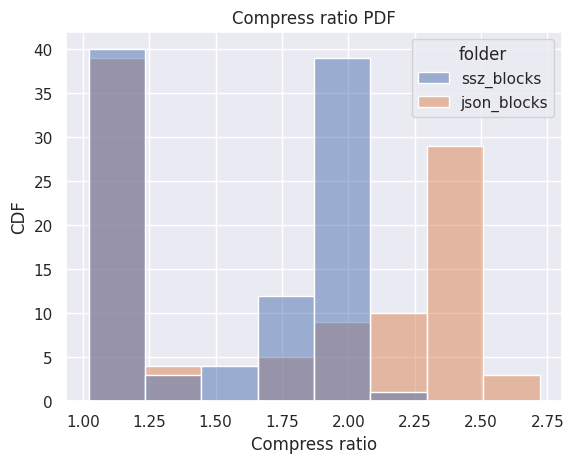

In [12]:
# Compress Ratio
dfs = dfs.sort_values('compress-ratio')
sns.set()
g = sns.ecdfplot(data=dfs, x='compress-ratio', hue='folder')
g.set(title="Compress ratio CDF", xlabel="Compress ratio", ylabel="CDF")
plt.savefig(RESULTS_FOLDER+'/plots/compression_ratio_cdf.png')
plt.show()

sns.set()
g = sns.histplot(data=dfs, x='compress-ratio', bins=8, hue='folder')
g.set(title="Compress ratio PDF", xlabel="Compress ratio", ylabel="CDF")
plt.savefig(RESULTS_FOLDER+'/plots/compression_ratio_pdf.png')
plt.show()


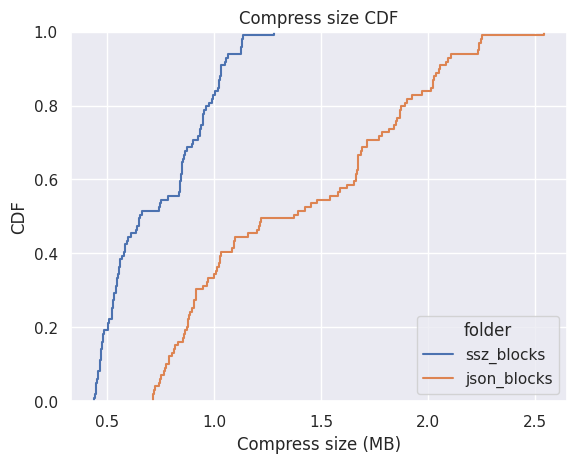

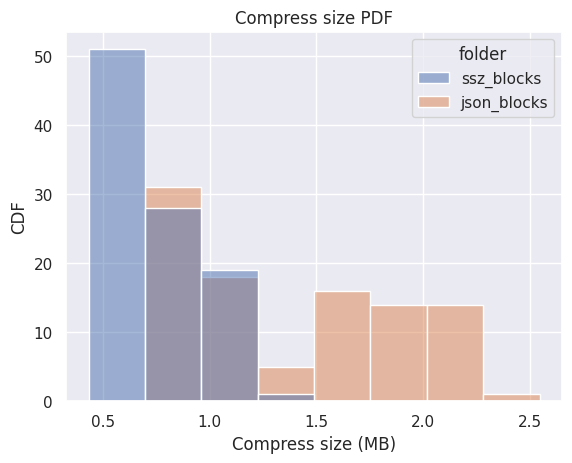

In [13]:
# Compress Size
dfs = dfs.sort_values('compress-size')
dfs['compress_size_mb'] = dfs['compress-size'] / 1000_000 # MB
sns.set()
g = sns.ecdfplot(data=dfs, x='compress_size_mb', hue='folder')
g.set(title="Compress size CDF", xlabel="Compress size (MB)", ylabel="CDF")
plt.savefig(RESULTS_FOLDER+'/plots/compressed_size_cdf.png')
plt.show()

sns.set()
g = sns.histplot(data=dfs, x='compress_size_mb', bins=8, hue='folder')
g.set(title="Compress size PDF", xlabel="Compress size (MB)", ylabel="CDF")
plt.savefig(RESULTS_FOLDER+'/plots/compressed_size_pdf.png')
plt.show()